In [40]:
# importing the necessary libraries

import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

In [41]:
# reading CSV files

Ng_data = pd.read_csv("NG_youtube_data.csv")
US_data = pd.read_csv("us_Youtube_data.csv")

In [42]:
Ng_data.head(3)

,title,videoId,channelId,channelTitle,categoryId,VideoCategoryDescription,Description,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,publishedAt,duration
0,FAMILY MATTERS | Brodashaggi | Mr Ibu | Kiriku...,Zv1i-Cdn4Ik,UCG6orNVuXIICv9_ifH6msIA,official BRODA SHAGGI,23,Comedy,Please SUBSCRIBE to Broda Shaggi Official YouT...,654033,30422,0,1474,0,22/10/2022,PT10M18S
1,Best Friends in the World: Senior Year | Episo...,BmCkK7W7j0Q,UCCl71WmqkG8BjVuySOSCh_Q,Neptune3 Studios,1,Film & Animation,"EP 13 ""The Protest"" - Olive leads a protest ag...",299169,21292,0,2012,0,28/10/2022,PT1H5M22S
2,ROMOLA ALAKARA - Latest 2022 Yoruba Movie Star...,seZb9P7H6MU,UCK2-495cMvdhaMqXcLlgmcg,YORUBAPLAY,24,Entertainment,Find out where the story leads in this latest ...,553886,5252,0,586,0,21/10/2022,PT1H9M27S


In [43]:
US_data.head(3)

,channelId,channelTitle,videoId,publishedAt,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
0,UCU1_l0ZJyTK_7HZZ3Ruw8Dg,MAPS,pTnk3ziVVRM,2014-01-10T01:24:57.000Z,Psychedelic Horizons Beyond Psychotherapy Work...,Watch the full workshop at http://psychedelics...,29,Nonprofits & Activism,PT1H19M40S,4780,hd,False,1512,8.0,0.0,1.0
1,UCLuO2lUqHrPIIpx0hFenV2g,Tink Tink Club,cuJjSeHZIrg,2015-06-18T16:56:04.000Z,Episode 35 - Dr. James Fadiman,Dr. James Fadiman is the father of modern psyc...,22,People & Blogs,PT1H12M34S,4354,sd,False,881,14.0,0.0,3.0
2,UCihqrkaOgVMfLNo2W1hSliA,Podcast Bunk,IuyuZfWtGgg,2016-05-01T05:33:13.000Z,#325 Microdosing from The Adam and Dr Drew Sho...,Adam and Dr. Drew are solo today and they open...,22,People & Blogs,PT50M40S,3040,sd,False,67,0.0,1.0,3.0


In [5]:
Ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     50 non-null     object
 1   videoId                   50 non-null     object
 2   channelId                 50 non-null     object
 3   channelTitle              50 non-null     object
 4   categoryId                50 non-null     int64 
 5   VideoCategoryDescription  50 non-null     object
 6   Description               44 non-null     object
 7   viewCount                 50 non-null     int64 
 8   likeCount                 50 non-null     int64 
 9   dislikeCount              50 non-null     int64 
 10  commentCount              50 non-null     int64 
 11  favoriteCount             50 non-null     int64 
 12  publishedAt               50 non-null     object
 13  duration                  50 non-null     object
dtypes: int64(6), object(8)
memor

In [6]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           115 non-null    object 
 1   channelTitle        115 non-null    object 
 2   videoId             115 non-null    object 
 3   publishedAt         115 non-null    object 
 4   videoTitle          115 non-null    object 
 5   videoDescription    109 non-null    object 
 6   videoCategoryId     115 non-null    int64  
 7   videoCategoryLabel  115 non-null    object 
 8   duration            115 non-null    object 
 9   durationSec         115 non-null    int64  
 10  definition          115 non-null    object 
 11  caption             115 non-null    bool   
 12  viewCount           115 non-null    int64  
 13  likeCount           111 non-null    float64
 14  dislikeCount        111 non-null    float64
 15  commentCount        113 non-null    float64
dtypes: bool(

In [24]:
US_data = US_data.iloc[:80]
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 35 to 46
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   videoId                   44 non-null     object
 1   VideoCategoryDescription  44 non-null     object
 2   Description               44 non-null     object
 3   viewCount                 44 non-null     int64 
 4   likeCount                 44 non-null     int64 
 5   commentCount              44 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.4+ KB


In [25]:
Ng_data.sort_values(["viewCount", "likeCount", "commentCount"], ascending=[True, True, True], inplace= True)

In [26]:
Ng_data.head()

,videoId,VideoCategoryDescription,Description,viewCount,likeCount,commentCount
35,qo-K3YlcfU0,Entertainment,#IzzGone #TwyseAndFamily\n\nTwyse and Family T...,80375,6174,223
26,oL_NxgHJ_M4,Music,"Get ""Young Preacher"" by BLAQBONEZ here: https...",83489,8767,710
40,MyVG-UcdLU8,Entertainment,Subscribe to our YouTube channel\nhttps://www....,116950,2737,269
17,bC95DBzHuw8,Entertainment,The youths of Ilu Iloro want Morolayo Adunni t...,122437,2877,505
49,veIB8gLx5GM,Comedy,Tegwolo's father has just joined the police. T...,135198,5985,195


In [27]:
US_data.sort_values(["viewCount", "likeCount", "commentCount"], ascending=[True, True, True], inplace= True)
US_data.head(4)

,videoId,VideoCategoryDescription,Description,viewCount,likeCount,commentCount
35,qo-K3YlcfU0,Entertainment,#IzzGone #TwyseAndFamily\n\nTwyse and Family T...,80375,6174,223
26,oL_NxgHJ_M4,Music,"Get ""Young Preacher"" by BLAQBONEZ here: https...",83489,8767,710
40,MyVG-UcdLU8,Entertainment,Subscribe to our YouTube channel\nhttps://www....,116950,2737,269
17,bC95DBzHuw8,Entertainment,The youths of Ilu Iloro want Morolayo Adunni t...,122437,2877,505


In [46]:
US_data["VideoCategoryDescription"] = US_data["videoCategoryLabel"]
US_data["Description"] = US_data[""]

In [47]:
Ng_data.isna().sum()

title                       0
videoId                     0
channelId                   0
channelTitle                0
categoryId                  0
VideoCategoryDescription    0
Description                 6
viewCount                   0
likeCount                   0
dislikeCount                0
commentCount                0
favoriteCount               0
publishedAt                 0
duration                    0
dtype: int64

In [48]:
US_data.isna().sum()

channelId                   0
channelTitle                0
videoId                     0
publishedAt                 0
videoTitle                  0
videoDescription            6
videoCategoryId             0
videoCategoryLabel          0
duration                    0
durationSec                 0
definition                  0
caption                     0
viewCount                   0
likeCount                   4
dislikeCount                4
commentCount                2
VideoCategoryDescription    0
dtype: int64

In [49]:
Ng_data = Ng_data.dropna()
print(Ng_data.isna().sum())

title                       0
videoId                     0
channelId                   0
channelTitle                0
categoryId                  0
VideoCategoryDescription    0
Description                 0
viewCount                   0
likeCount                   0
dislikeCount                0
commentCount                0
favoriteCount               0
publishedAt                 0
duration                    0
dtype: int64


In [50]:
Ng_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     44 non-null     object
 1   videoId                   44 non-null     object
 2   channelId                 44 non-null     object
 3   channelTitle              44 non-null     object
 4   categoryId                44 non-null     int64 
 5   VideoCategoryDescription  44 non-null     object
 6   Description               44 non-null     object
 7   viewCount                 44 non-null     int64 
 8   likeCount                 44 non-null     int64 
 9   dislikeCount              44 non-null     int64 
 10  commentCount              44 non-null     int64 
 11  favoriteCount             44 non-null     int64 
 12  publishedAt               44 non-null     object
 13  duration                  44 non-null     object
dtypes: int64(6), object(8)
memor

In [51]:
Ng_data =Ng_data[["videoId", "VideoCategoryDescription", "Description", "viewCount" , "likeCount", "commentCount"]]

Ng_data.head()

,videoId,VideoCategoryDescription,Description,viewCount,likeCount,commentCount
0,Zv1i-Cdn4Ik,Comedy,Please SUBSCRIBE to Broda Shaggi Official YouT...,654033,30422,1474
1,BmCkK7W7j0Q,Film & Animation,"EP 13 ""The Protest"" - Olive leads a protest ag...",299169,21292,2012
2,seZb9P7H6MU,Entertainment,Find out where the story leads in this latest ...,553886,5252,586
3,pbATe_uZFTE,Music,Provided to YouTube by Starboy/RCA Records\n\n...,197492,8561,0
5,Ga_i97g0uFY,Sports,The Nigerian striker smashes home the winner w...,1350957,21167,1043


In [52]:
US_data =US_data[["videoId", "VideoCategoryDescription", "Description", "viewCount" , "likeCount", "commentCount"]]

US_data.head()

KeyError: "['Description'] not in index"

In [34]:
Ng_data.describe()

,viewCount,likeCount,commentCount
count,4.400000e+01,4.400000e+01,44.000000
mean,2.338803e+06,1.467370e+05,3672.886364
std,5.549736e+06,5.714969e+05,7529.054492
min,8.037500e+04,1.745000e+03,0.000000
25%,2.030915e+05,4.876750e+03,304.250000
50%,6.039595e+05,1.166200e+04,613.000000
75%,1.657581e+06,5.696525e+04,2732.500000
max,3.454361e+07,3.757194e+06,32438.000000


In [35]:
US_data.describe()

,viewCount,likeCount,commentCount
count,4.400000e+01,4.400000e+01,44.000000
mean,2.338803e+06,1.467370e+05,3672.886364
std,5.549736e+06,5.714969e+05,7529.054492
min,8.037500e+04,1.745000e+03,0.000000
25%,2.030915e+05,4.876750e+03,304.250000
50%,6.039595e+05,1.166200e+04,613.000000
75%,1.657581e+06,5.696525e+04,2732.500000
max,3.454361e+07,3.757194e+06,32438.000000


In [36]:
Ng_data.corr()

/var/folders/0c/ztv6vp6971zcyw9kflycnw100000gn/T/ipykernel_6674/3142781792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Ng_data.corr()


,viewCount,likeCount,commentCount
viewCount,1.000000,0.954152,0.714238
likeCount,0.954152,1.000000,0.641059
commentCount,0.714238,0.641059,1.000000


In [37]:
US_data.corr()

/var/folders/0c/ztv6vp6971zcyw9kflycnw100000gn/T/ipykernel_6674/230828419.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  US_data.corr()


,viewCount,likeCount,commentCount
viewCount,1.000000,0.954152,0.714238
likeCount,0.954152,1.000000,0.641059
commentCount,0.714238,0.641059,1.000000


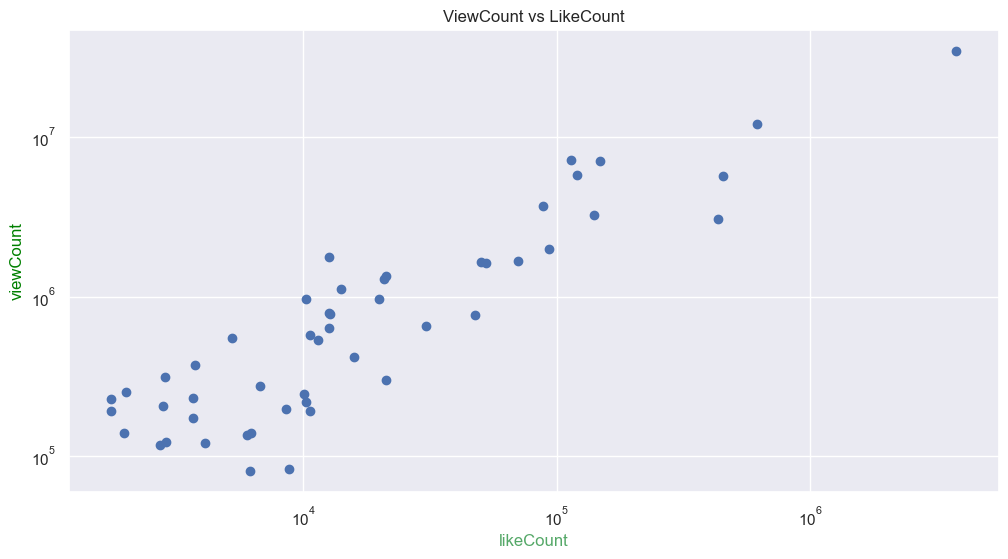

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(Ng_data['likeCount'], Ng_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount vs LikeCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("likeCount", color= "g")
plt.show()

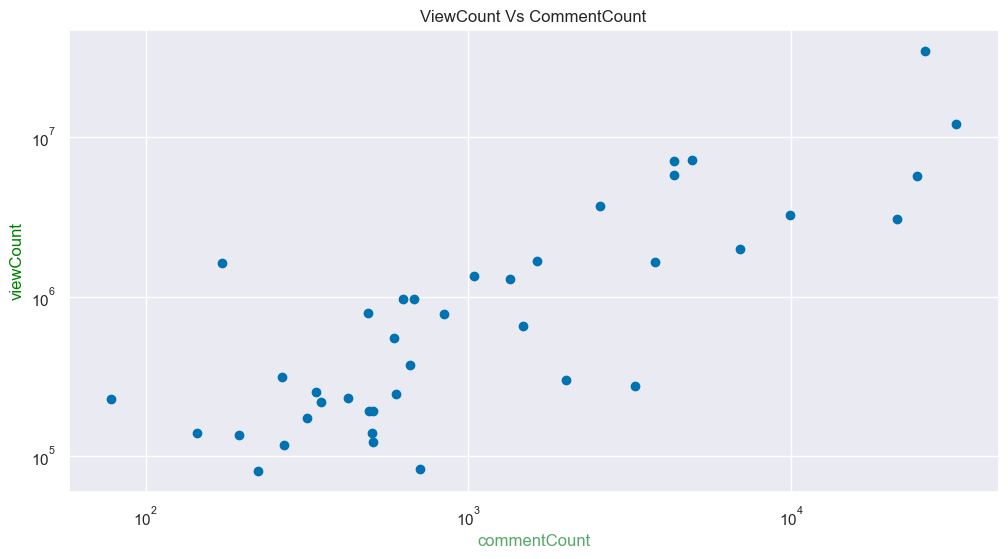

In [39]:
# plotting ViewCount against likeCount

plt.figure(figsize=(12,6))
plt.scatter(Ng_data['commentCount'], Ng_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount Vs CommentCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("commentCount", color= "g")
plt.show()